In [ ]:
# importing the required packages 
import cv2 
from zipfile import ZipFile
import shutil
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

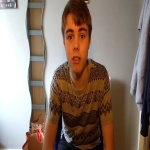

In [ ]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/frames/TCzYD74Xqe8.000/TCzYD74Xqe8.000_5.jpg')
cv2_imshow(img)

In [ ]:
l = ['01','02','03','04','05','06','07','08','09']
l_1 = list(map(str,list(range(10,26))))
[l.append(i) for i in l_1]

In [ ]:
 for i in l:
   !unzip -P .chalearnLAPFirstImpressionsSECONDRoundICPRWorkshop2016. gdrive/'My Drive'/test80_{i}.zip

In [ ]:
# shutil.rmtree('test')

In [ ]:
os.mkdir('test')

In [ ]:
for i in l:
  print(f'Extracting folder test80_{i}')
  !unzip test80_{i}.zip -d test
  # after extracting contents remove the original folder
  os.remove(f'test80_{i}.zip')

In [ ]:
# Training 
# l = ['01','02','03','04','05','06','07','08','09','10','11','12']
l = list(map(str,range(62,76)))
for i in l:
  file_name = 'training80_'+i+'.zip'
  folder_to_extract = 'training80_'+i
  print(folder_to_extract)
  #make directory of the same name 
  os.mkdir(folder_to_extract)

  zf = ZipFile(file_name, 'r')
  zf.extractall(folder_to_extract)
  zf.close()

  #delete orginal folder
  os.remove(file_name)



training80_62
training80_63
training80_64
training80_65
training80_66
training80_67
training80_68
training80_69
training80_70
training80_71
training80_72
training80_73
training80_74
training80_75


In [ ]:
# Validation 
# l = ['01','02','03','04','05','06','07','08','09','10','11','12','13']
l = list(map(str,range(14,26)))
for i in l:
  file_name = 'validation80_'+i+'.zip'
  folder_to_extract = 'validation80_'+i
  print(folder_to_extract)
  #make directory of the same name 
  os.mkdir(folder_to_extract)

  zf = ZipFile(file_name, 'r')
  zf.extractall(folder_to_extract)
  zf.close()

  #delete orginal folder
  os.remove(file_name)


validation80_14
validation80_15
validation80_16
validation80_17
validation80_18
validation80_19
validation80_20
validation80_21
validation80_22
validation80_23
validation80_24
validation80_25


In [ ]:
count = 0
# for i in l:
#   folder_name = 'training80_'+i
#   count += len(os.listdir(folder_name))

for i in l:
  folder_name = 'validation80_'+i
  count += len(os.listdir(folder_name))

print('total video files are: ',count)

total video files are:  1040


In [ ]:
# lets look at the avg length of the videos 

def count_frames(path):
  video = cv2.VideoCapture(path)
  total = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
  rate = video.get(cv2.CAP_PROP_FPS)
#  rgb_flag = 
#  w = 
#  h = 
  return total, rate

In [ ]:
for i in l:
  total_time = 0
  folder_name = 'training80_'+i
  for j in os.listdir(folder_name):
    path = folder_name+'/'+j
    total, rate = count_frames(path)
    time = total / rate 
    total_time += time
  print(f'Avg length of videos in folder {folder_name} is {total_time/len(os.listdir(folder_name))} secs')


In [ ]:
# check if videos are in RGB format 
# cv2.CAP_PROP_CONVERT_RGB is a booloean flag indicating if the videos need to be converted to RGB or not i.e. False/ 0 = no need to convert 

# loop through all video files and see if any video needs to be converted i.e. its not in RGB format 
for i in l:
  total_time = 0
  folder_name = 'training80_'+i
  print('Entering folder ',folder_name)
  for j in os.listdir(folder_name):
    path = folder_name+'/'+j
    video = cv2.VideoCapture(path)
    rgb_flg = video.get(cv2.CAP_PROP_CONVERT_RGB)

    if rgb_flg == True:
      print(path, 'Needs to be converted') 
      
# all flags were false hence no need to convert 

In [ ]:
# function to extract 15 frames from each video and store it in a folder 

def extract_frames(path, flag = 'train'):

  name = path.split('/')[1]
  file_name = name.split('.mp4')[0]
  cap = cv2.VideoCapture(path)

  # make folder to save extracted frames 
  try:
    if flag == 'validation':
      path_ = 'val_frames/'
      os.makedirs(path_ + file_name)
    elif flag == 'test':
      path_ = 'test_frames/'
      os.makedirs(path_ + file_name)
    else:
      path_ = 'frames/'
      os.makedirs(path_ + file_name)
  except FileExistsError:
    print('Folder already exists')

  # counter variable 
  count =0 
  # flag for knowing if frames were successfully extracted 
  success = 1

  total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

  # set frame limit to 100 using cap.set() which sets the camera parameters 
  cap.set(cv2.CAP_PROP_FRAME_COUNT, 16) # starts count from 1 not 0 hence, 16 not 15


  while success:
    count +=1

    if count >= total_frames or count == 16:
      break

    success, frame = cap.read()
    # resizing frame to save space  and also for modelling
    frame = cv2.resize(frame,(150, 150), interpolation= cv2.INTER_AREA)  # cv2.INTER_AREA good for shrinking images 
    # interpolation is used to estimate the values of the unknown pixels, bicubic interpolation uses 4X4  pixels 
    # i.e. it uses weighed average of 16 pixels, unknown pixels can be at different distances. it gives higher weight to closer pixels. 
    
    # save the frame
    frame_path = path_ + file_name + '/' + file_name +'_' +str(count) + '.jpg'
    
    cv2.imwrite(frame_path, frame)

    if cv2.waitKey(1) & 0xFF == ord('q'): # give the user one millisecond to press 'q' key to abort
      break
  
  cap.release()

In [ ]:
# extracting frames from train data set
try:
  os.makedirs('frames') # frames is the folder which will contain 960 cub folders having 100 frames from each of the videos
except FileExistsError:
    print('Frames Folder already exists')

# loop to extract the frames 
for i in l:
  folder_name = 'training80_'+i
  print('Entering folder ',folder_name)

  for j in os.listdir(folder_name):
    path = folder_name+'/'+j
    extract_frames(path)


Entering folder  training80_62
Entering folder  training80_63
Entering folder  training80_64
Entering folder  training80_65
Entering folder  training80_66
Entering folder  training80_67
Entering folder  training80_68
Entering folder  training80_69
Entering folder  training80_70
Entering folder  training80_71
Entering folder  training80_72
Entering folder  training80_73
Entering folder  training80_74
Entering folder  training80_75


In [ ]:
# extracting frames from validation data set
try:
  os.makedirs('val_frames') # frames is the folder which will contain 960 cub folders having 15 frames from each of the videos
except FileExistsError:
    print('Validation Frames Folder already exists')

# loop to extract the frames 
for i in l:
  folder_name = 'validation80_'+i
  print('Entering folder ',folder_name)

  for j in os.listdir(folder_name):
    path = folder_name+'/'+j
    extract_frames(path, flag = 'validation')

Entering folder  validation80_14
Entering folder  validation80_15
Entering folder  validation80_16
Entering folder  validation80_17
Entering folder  validation80_18
Entering folder  validation80_19
Entering folder  validation80_20
Entering folder  validation80_21
Entering folder  validation80_22
Entering folder  validation80_23
Entering folder  validation80_24
Entering folder  validation80_25


In [ ]:
len(os.listdir('test'))

In [ ]:
# extracting frames from validation data set
try:
  os.makedirs('test_frames') # frames is the folder which will contain 960 cub folders having 15 frames from each of the videos
except FileExistsError:
    print('Test Frames Folder already exists')

count = 0
for j in os.listdir('test'):
  path = 'test'+'/'+j
  extract_frames(path, flag = 'test')

  count +=1
  if count %10 ==0:
    print(count)

In [ ]:
shutil.rmtree('val_frames')

In [ ]:
shutil.rmtree('frames')

In [ ]:
for i in l:
  folder_name = 'training80_'+ i
  shutil.rmtree(folder_name)

In [ ]:
for i in l:
  folder_name = 'validation80_'+ i
  shutil.rmtree(folder_name)

In [ ]:
!zip -r gdrive/'My Drive'/val_frames_2.zip val_frames

In [ ]:
!zip -r gdrive/'My Drive'/test_frames.zip test_frames

In [ ]:
os.listdir('frames/QMRAbwZCTfI.005')

In [ ]:
with ZipFile('gdrive/My Drive/train-annotation.zip') as zf:
    zf.extractall()

In [ ]:
anot = pd.read_pickle('annotation_training.pkl')

In [ ]:
anot.keys()

dict_keys(['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'interview', 'openness'])

In [ ]:
v = []
for i in anot.keys():
  if i != 'interview':
    v .append(list(anot[i].values()))

In [ ]:
df = pd.DataFrame(v).transpose()
df.columns = ['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness']

[Text(0, 0, 'extraversion'),
 Text(0, 0, 'neuroticism'),
 Text(0, 0, 'agreeableness'),
 Text(0, 0, 'conscientiousness'),
 Text(0, 0, 'openness')]

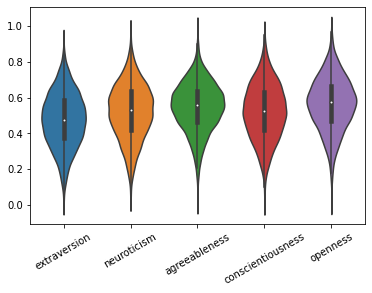

In [ ]:
g = sns.violinplot(data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=30)

In [ ]:
hist_1 = pd.read_csv('gdrive/My Drive/hist_aud_vid_1.csv',index_col=0)
hist_2 = pd.read_csv('gdrive/My Drive/hist_aud_vid_2.csv',index_col=0)

In [ ]:
hist = hist_1.append(hist_2,ignore_index= True)

In [ ]:
hist

,val_loss,val_mean_acc,loss,mean_acc
0,0.021474,0.885078,0.023851,0.875710
1,0.022161,0.887279,0.022015,0.880172
2,0.009122,0.890359,0.020942,0.883292
3,0.032357,0.892074,0.019898,0.886722
4,0.019311,0.894883,0.018397,0.890967
5,0.015429,0.896569,0.016989,0.895574
6,0.031223,0.898870,0.015803,0.899661
7,0.010247,0.898878,0.014486,0.904048
8,0.023635,0.899657,0.013812,0.906576
9,0.008793,0.901918,0.012983,0.909319


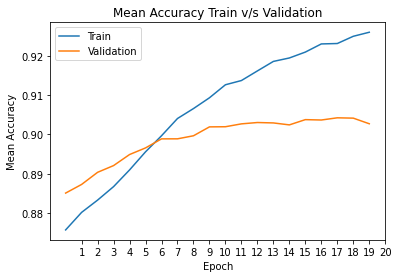

In [ ]:
plt.plot(hist['mean_acc']) 
plt.plot(hist['val_mean_acc'])
plt.title('Mean Accuracy Train v/s Validation')
plt.ylabel('Mean Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') 
plt.xticks(range(1,21))
plt.show()

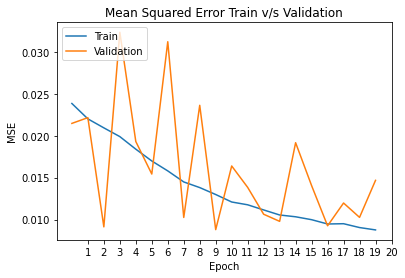

In [ ]:
plt.plot(hist['loss']) 
plt.plot(hist['val_loss'])
plt.title('Mean Squared Error Train v/s Validation')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') 
plt.xticks(range(1,21))
plt.show()